In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [11]:
df = pd.read_csv("/content/zomato_reviews.csv")

In [12]:
df.head()


,Unnamed: 0,rating,review
0,0,5,nice
1,1,5,"best biryani , so supportive staff of outlet ,..."
2,2,4,delivery boy was very decent and supportive.👌👍
3,3,1,"worst biryani i have tasted in my life, half o..."
4,4,5,all food is good and tasty . will order again ...


In [13]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [14]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()  # Initialize the stemmer
stop_words = set(stopwords.words('english'))  # Load stopwords

# Drop missing values and reset index before creating corpus
df = df.dropna(subset=['review']).reset_index(drop=True)

corpus = []

for i in range(0, len(df)):  # Iterate through the entire DataFrame
    review = df['review'][i]

    if not isinstance(review, str):
        review = ""

    zomato_rating = re.sub('[^a-zA-Z]', ' ', review)
    zomato_rating = zomato_rating.lower()
    zomato_rating = zomato_rating.split()

    # Remove stopwords and apply stemming
    zomato_rating = [stemmer.stem(word) for word in zomato_rating if word not in stop_words]
    zomato_rating = ' '.join(zomato_rating)

    corpus.append(zomato_rating)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
df = df.dropna(subset=['review']).reset_index(drop=True)


In [16]:
print(corpus)

['nice', 'best biryani support staff outlet person order call say full paisa vasool', 'deliveri boy decent support', 'worst biryani tast life half biryani dustbin', 'food good tasti order lot explor bawarchi menu', 'shandar zabardast zindabad good go bawarchi keep', 'overal good experi order', 'good cold food', 'tasti food homestyl tasti preprat', 'love', 'full paisa vasool tast best bawarchi aur everest', 'good tast authent punjabi style matar paneer feel good food surat', 'tasti authent food', 'superb tasti asli dilli wala flavour', 'yummiest manchurian fri rice ever citi authent chines tast must order', 'veey tasti order nd', 'order manchurian fri rice instead got simpl fri rice feel like cheat bawarchi restaur', 'bad properli cook', 'delici', 'chines chees kulcha good fusion chinses punjabi cuisin accomplish dal makhni yummi butter milk must order', 'tastei best zabardast mouthwat must order', 'tast less nd took min deliv order', 'tri lot dish bawarchi choos best realli tough task 

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()
y=df.iloc[:, -1].values


In [18]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Naive Bayes model

In [19]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB() # Removed 'multi.'
classifier.fit(X_train, y_train)

GaussianNB()

In [20]:
y_pred=classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['Very disappointed' 'what a disappointment']
 ['Mast' 'mast']
 ['tasty' 'veey tasty. . order again nd again']
 ...
 ['nice' 'Nice 👍']
 ['Loved it.' 'loved it . 5/5 . ']
 ['.' 'I ordered 4 vada pav n i got only 3']]


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 1 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


0.21624087591240876

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Clean the text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Assuming your DataFrame has 'review' and 'rating' columns
# Change 'Review' and 'Rating' to the actual column names
df = df[['review', 'rating']].dropna()  # Changed column names here
# Create a new column 'Review_Text' with cleaned reviews
df['Review_Text'] = df['review'].apply(clean_text) # Changed column name here

# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Review_Text'])

sequences = tokenizer.texts_to_sequences(df['Review_Text'])
padded = pad_sequences(sequences, padding='post', maxlen=100)

# Convert rating to integer categories (assuming 1 to 5 stars)
# Assuming 'rating' column contains numerical ratings
labels = np.array(df['rating'].astype(int)) # Changed column name here

# USING RNN

In [23]:
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Constants
VOCAB_SIZE = 10000
MAX_LENGTH = 100

model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=64, input_length=MAX_LENGTH),
    SimpleRNN(64),
    Dense(64, activation='relu'),
    Dense(6, activation='softmax')  # 6 classes: typically use 6 if ratings go 0–5; adjust if needed
])

model.build(input_shape=(None, MAX_LENGTH))  # Build the model explicitly

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 652,806 (2.49 MB)

 Trainable params: 652,806 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=64)


Epoch 1/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.4174 - loss: 1.4448 - val_accuracy: 0.3321 - val_loss: 1.3636
Epoch 2/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.3841 - loss: 1.3265 - val_accuracy: 0.3330 - val_loss: 1.3603
Epoch 3/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4015 - loss: 1.3349 - val_accuracy: 0.4151 - val_loss: 1.3644
Epoch 4/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.4142 - loss: 1.3253 - val_accuracy: 0.4151 - val_loss: 1.3571
Epoch 5/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4179 - loss: 1.3183 - val_accuracy: 0.4151 - val_loss: 1.3584


In [26]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4230 - loss: 1.3254
Test Accuracy: 0.42


**EDA (Exploratory Data Analysis)**

In [30]:
df = pd.read_csv("/content/zomato_reviews.csv")
df.head()

,Unnamed: 0,rating,review
0,0,5,nice
1,1,5,"best biryani , so supportive staff of outlet ,..."
2,2,4,delivery boy was very decent and supportive.👌👍
3,3,1,"worst biryani i have tasted in my life, half o..."
4,4,5,all food is good and tasty . will order again ...


In [31]:
df.drop(df.columns[0], axis=1, inplace=True)
print(df.head())

   rating                                             review
0       5                                               nice
1       5  best biryani , so supportive staff of outlet ,...
2       4     delivery boy was very decent and supportive.👌👍
3       1  worst biryani i have tasted in my life, half o...
4       5  all food is good and tasty . will order again ...


In [32]:
df.shape

(5479, 2)

In [34]:
df.describe()

,rating
count,5479.000000
mean,3.161343
std,1.782197
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


In [36]:
#is there any missing value? Yes just one on review
#that won't affect anyways

df.isnull().sum()

,0
rating,0
review,1


In [37]:
df.duplicated().sum()

np.int64(860)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  5479 non-null   int64 
 1   review  5478 non-null   object
dtypes: int64(1), object(1)
memory usage: 85.7+ KB


<Axes: xlabel='rating', ylabel='count'>

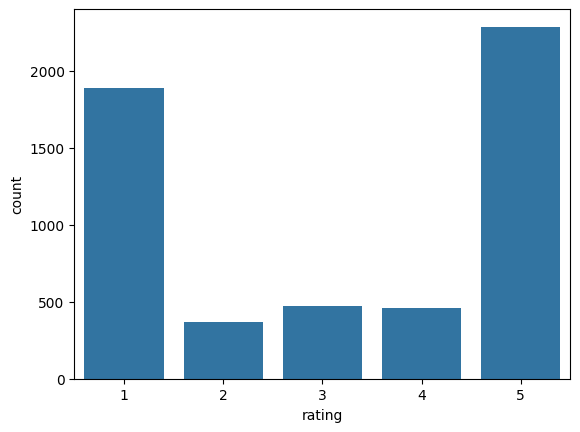

In [39]:
sns.countplot(data = df, x = 'rating')     #plot for rating against count

FE (Feature Engineering)

In [42]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.6 MB/s eta 0:00:00


In [43]:
#now comes the main NLP part
#we will remove symbols, emojis and other unique characters from the dataset
#this is a crucial part of NLP

import re
import emoji

def cleantext(text):
    if isinstance(text, str):  #check if text is a string
        # Remove emojis
        text = emoji.demojize(text)
        text = re.sub(r'\s+$', '', text)  #remove trailing whitespace
        # Removing mentions
        text = re.sub(r"@[0-9a-zA-Z]+", "", text)   #removing @ and keeping numbers & texts
        # Removing '#' from reviews
        text = re.sub(r"#", "", text)      #removing #
        # Removing Retweets
        text = re.sub(r"RT[\s]+", "", text)
        # Removing hyperlinks
        text = re.sub(r"https?:\\/\\/S+", "", text)       #cleaning links
        # Remove extra whitespace
        text = re.sub(r"\s+", " ", text).strip()
    return text

In [44]:
df['review'] = df['review'].fillna('').apply(cleantext)

In [45]:
df.head()       #it is looking clean and ready now

,rating,review
0,5,nice
1,5,"best biryani , so supportive staff of outlet ,..."
2,4,delivery boy was very decent and supportive.:O...
3,1,"worst biryani i have tasted in my life, half o..."
4,5,all food is good and tasty . will order again ...


In [52]:
!pip install textblob

In [55]:
#lets create two new features
#1) Subjectivity & 2) Polarity
#for sentiments
'''This function takes a single row (not the full DataFrame), applies TextBlob on the review text, and returns two sentiment features:

subjectivity: how subjective (opinion-based) the text is.

Ranges from 0 (very objective) to 1 (very subjective).

polarity: the sentiment polarity of the text.

Ranges from -1 (very negative) to 1 (very positive).'''
from textblob import TextBlob # Import the TextBlob class
def calculate_sentiments(ds):
    sentiments = TextBlob(ds['review']).sentiment
    return pd.Series([sentiments.subjectivity, sentiments.polarity])

In [56]:
df[['subjectivity', 'polarity']] = df.apply(calculate_sentiments, axis = 1)
df.head()

,rating,review,subjectivity,polarity
0,5,nice,1.000000,0.600000
1,5,"best biryani , so supportive staff of outlet ,...",0.616667,0.616667
2,4,delivery boy was very decent and supportive.:O...,0.866667,0.216667
3,1,"worst biryani i have tasted in my life, half o...",0.583333,-0.583333
4,5,all food is good and tasty . will order again ...,0.550000,0.600000


In [57]:
#inbuilt stopwords for english from nltk module

stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [58]:
#removing stopwords from the text

def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))  # Load stopwords only once
  filtered_words = [word for word in text.split() if word not in stop_words]
  return ' '.join(filtered_words)

In [59]:
df['review']=df['review'].apply(remove_stopwords)    #applying

In [61]:
!pip install requests
import requests
from io import BytesIO
from PIL import Image

#url link to visualize our wordcloud in better and attractive way

url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Instagram_icon.png/768px-Instagram_icon.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
mask = np.array(img)

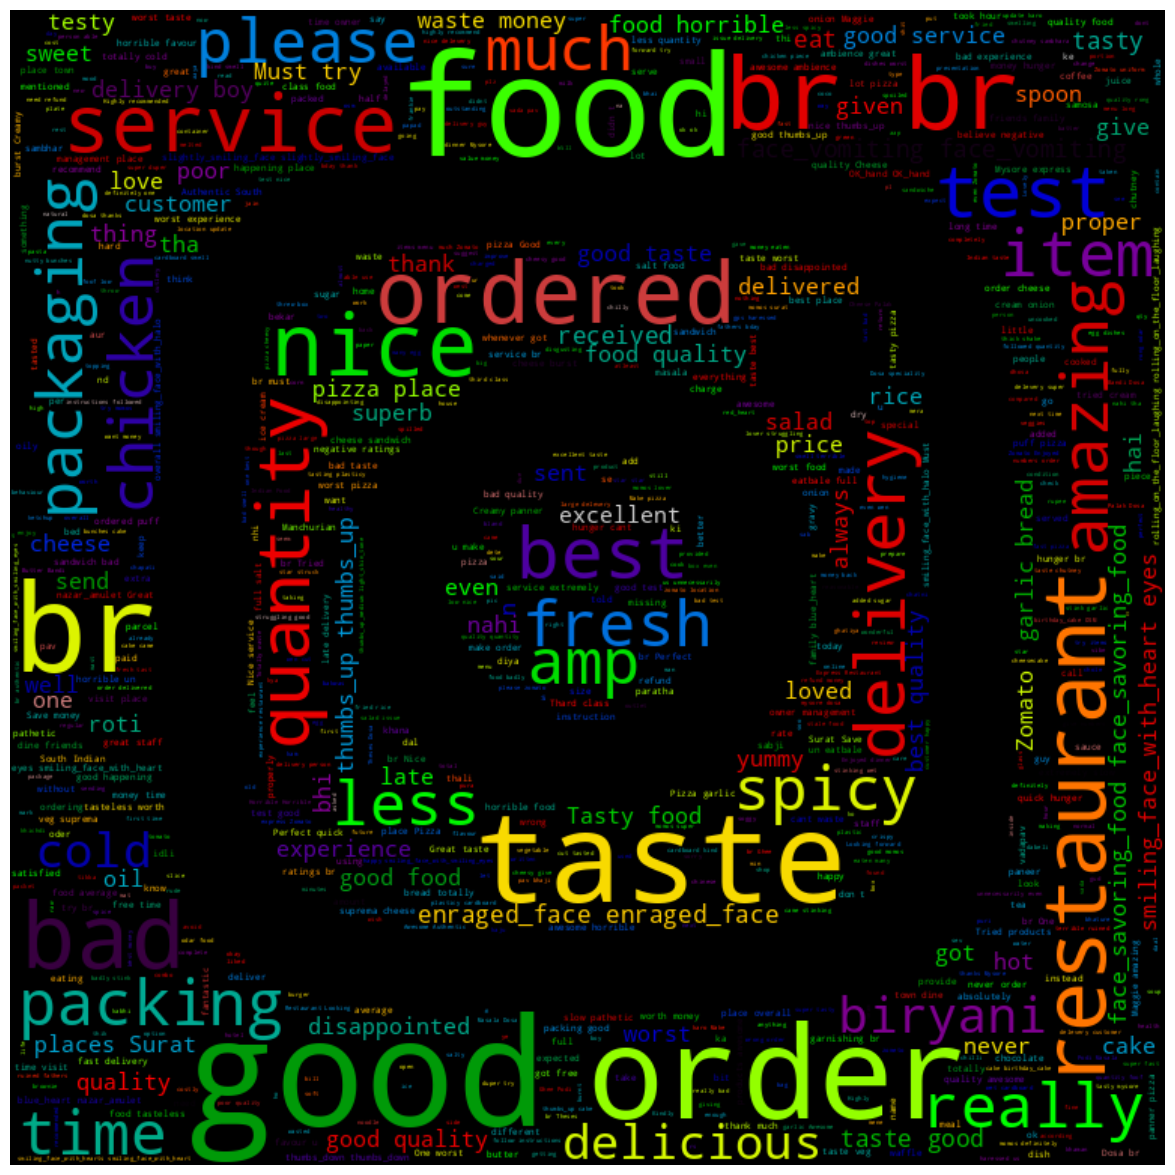

In [63]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS # Import WordCloud and STOPWORDS
import matplotlib.pyplot as plt

# ... (your existing code) ...

plt.figure(figsize=(15,15))
all_words = " ".join(words for words in df['review'])
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black',\
                      max_words=800,colormap="nipy_spectral", mask = mask).generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

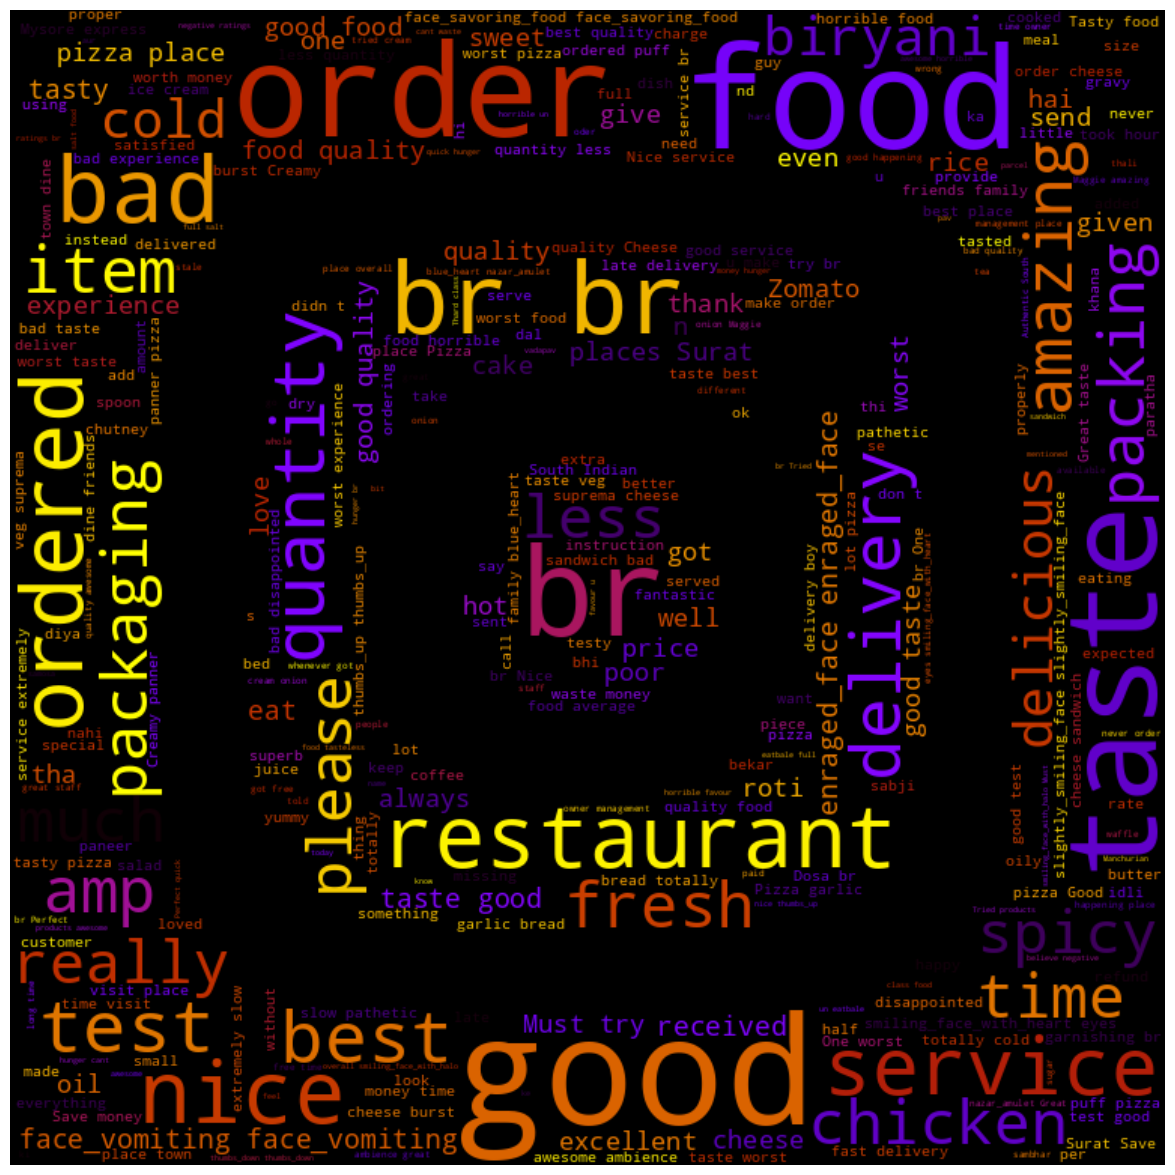

In [65]:
plt.figure(figsize=(15,15))
all_words = " ".join(words for words in df['review'])
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', \
                      max_words=800,colormap="gnuplot", mask = mask).generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

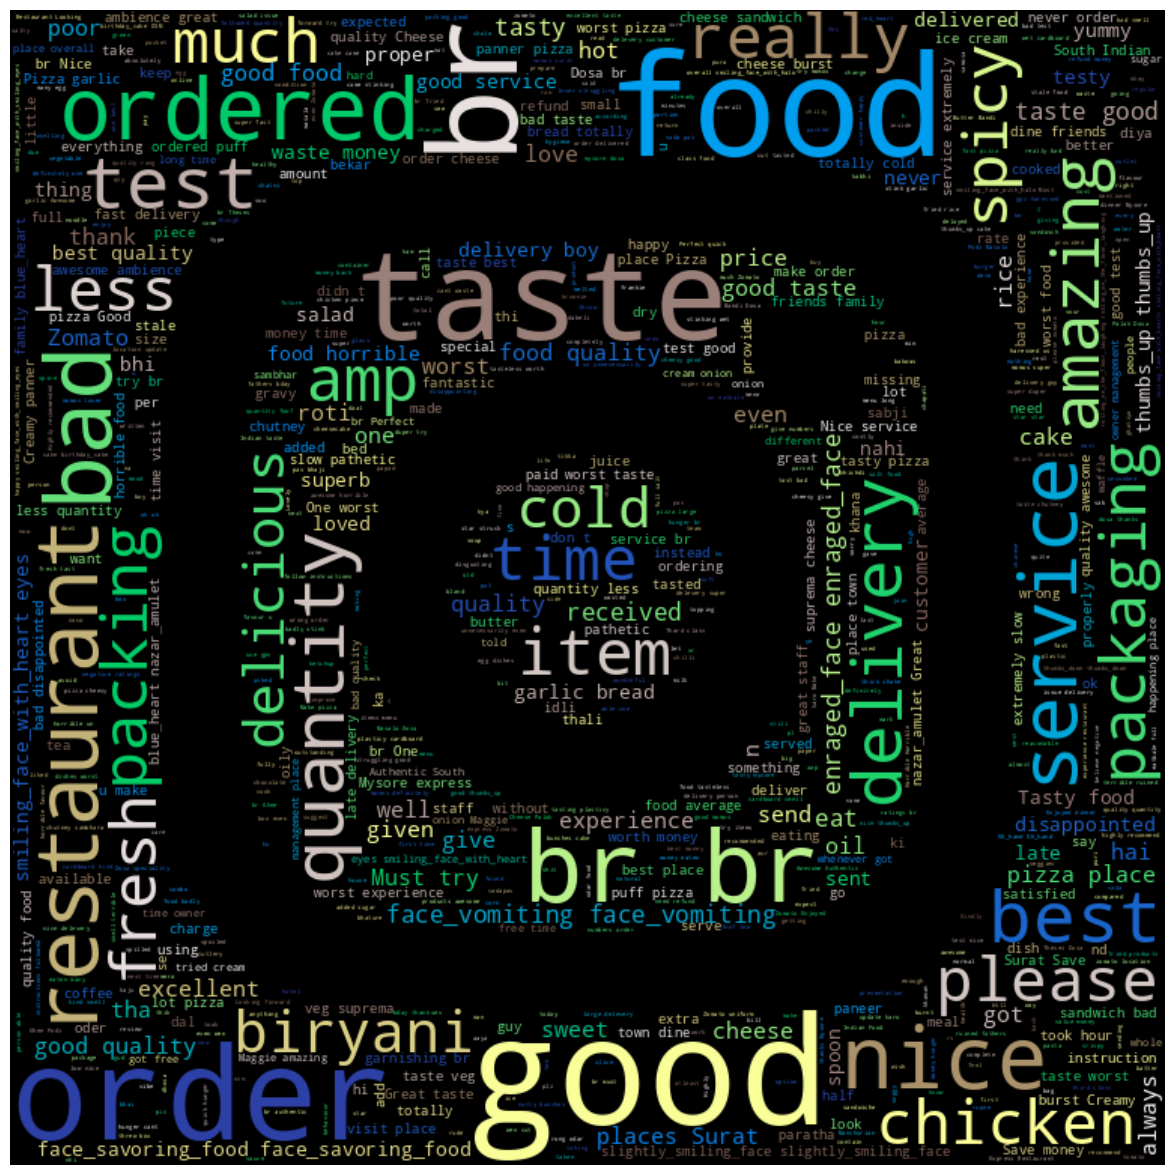

In [66]:
plt.figure(figsize=(15,15))
all_words = " ".join(words for words in df['review'])
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', \
                      max_words=800,colormap="terrain", mask = mask).generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [67]:
#creating new feature again fro sentiment analysis
#dividing it in to three -ve, +ve and neutral

def categorize_sentiment(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [68]:
#creating new feature for the same

df['sentiment_analysis'] = df['polarity'].apply(categorize_sentiment)
df.head()

,rating,review,subjectivity,polarity,sentiment_analysis
0,5,nice,1.000000,0.600000,Positive
1,5,"best biryani , supportive staff outlet , perso...",0.616667,0.616667,Positive
2,4,delivery boy decent supportive.:OK_hand::thumb...,0.866667,0.216667,Positive
3,1,"worst biryani tasted life, half biryani dustbin.",0.583333,-0.583333,Negative
4,5,food good tasty . order lots explore bawarchi'...,0.550000,0.600000,Positive


<Axes: xlabel='polarity', ylabel='Density'>

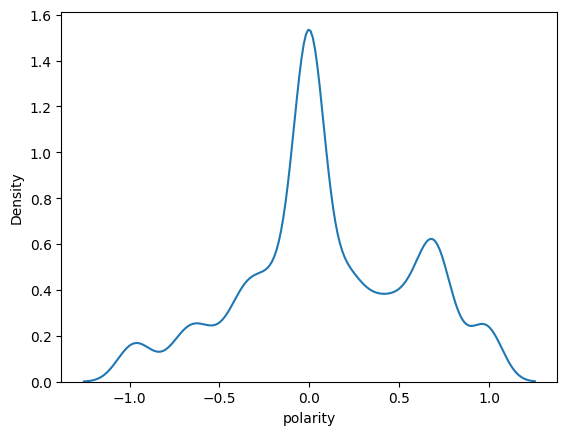

In [69]:
sns.kdeplot(data = df, x = "polarity")   #kde plot

<Axes: xlabel='polarity', ylabel='Count'>

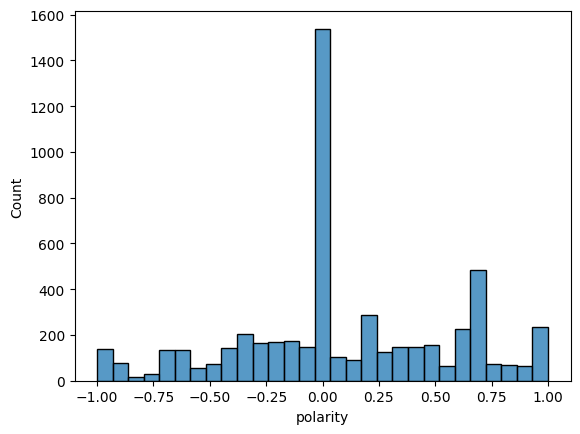

In [70]:
sns.histplot(data = df, x = 'polarity')    #hist plot

<Axes: xlabel='sentiment_analysis', ylabel='count'>

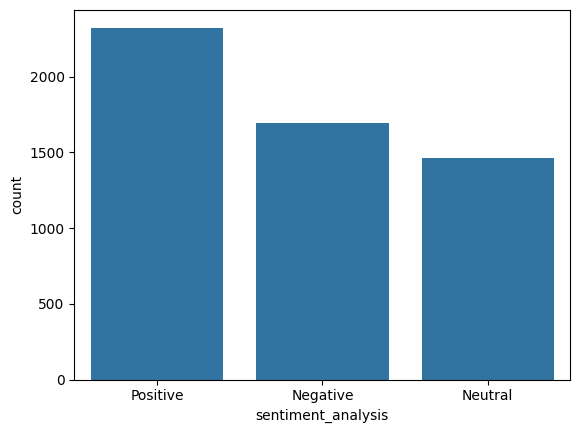

In [71]:
sns.countplot(data = df, x = 'sentiment_analysis')

In [72]:
#creating new dataframe from existing one

new_df = df
new_df.rename(columns= {'review_description' : 'text'}, inplace = True)
new_df = new_df[['review', 'sentiment_analysis']]
new_df

,review,sentiment_analysis
0,nice,Positive
1,"best biryani , supportive staff outlet , perso...",Positive
2,delivery boy decent supportive.:OK_hand::thumb...,Positive
3,"worst biryani tasted life, half biryani dustbin.",Negative
4,food good tasty . order lots explore bawarchi'...,Positive
...,...,...
5474,complain,Neutral
5475,took 1 hour assign valvet thn prepare food lik...,Negative
5476,"took hour prepare 3 khawsa, real life gets pre...",Positive
5477,"late, littrally time pass items proper",Negative


In [74]:
#encoding for sentiment analysis
#we can also do mapppinng as we only have 3 variables
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

encoder = LabelEncoder()
new_df['sentiment_analysis'] = encoder.fit_transform(new_df['sentiment_analysis'])

<ipython-input-74-0264fe6107ca>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['sentiment_analysis'] = encoder.fit_transform(new_df['sentiment_analysis'])


In [75]:
new_df.head()

,review,sentiment_analysis
0,nice,2
1,"best biryani , supportive staff outlet , perso...",2
2,delivery boy decent supportive.:OK_hand::thumb...,2
3,"worst biryani tasted life, half biryani dustbin.",0
4,food good tasty . order lots explore bawarchi'...,2


In [77]:
from sklearn.pipeline import Pipeline # Import the Pipeline class
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

# ... (your other code)

# Creating pipeline
pipeline = Pipeline([
    ('Vectorizing', CountVectorizer()),
    ('TFID', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

**FS (Feature Selection)**

In [78]:
#splitting data in 4

X = new_df['review']
y = new_df['sentiment_analysis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [79]:
#splitting data into 2

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [80]:
#fitting into pipline

pipeline.fit(X_train, y_train)

Pipeline(steps=[('Vectorizing', CountVectorizer()),
                ('TFID', TfidfTransformer()), ('classifier', MultinomialNB())])

In [81]:
#prediction

pred = pipeline.predict(X_test)

In [82]:
#confusion matrix

confusion_matrix(y_test, pred)

array([[258,  15,  46],
       [ 60, 134, 107],
       [ 44,  11, 421]])

In [84]:
#classification report
from sklearn.metrics import classification_report # Import the classification_report function

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       319
           1       0.84      0.45      0.58       301
           2       0.73      0.88      0.80       476

    accuracy                           0.74      1096
   macro avg       0.76      0.71      0.71      1096
weighted avg       0.76      0.74      0.73      1096



In [85]:
accuracy_score(y_test, pred)

0.7417883211678832